# Distribution with two gaussian peaks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
from scipy.stats import multivariate_normal

# 2D Gaussian

In [3]:
mean_0 = [1., 1.]
sigma_0 = [[0.5, 0.], [0., 0.5]]
mean_1 = [-1., -1.]
sigma_1 = [[0.5, 0.], [0., 0.5]]

In [4]:
g1 = multivariate_normal(mean=mean_0, cov=sigma_0)
g2 = multivariate_normal(mean=mean_1, cov=sigma_1)

## Data

In [5]:
points = np.linspace(-5, 5, 100)
x, y = np.meshgrid(points, points)

In [6]:
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
z = g1.pdf(pos) + g2.pdf(pos)

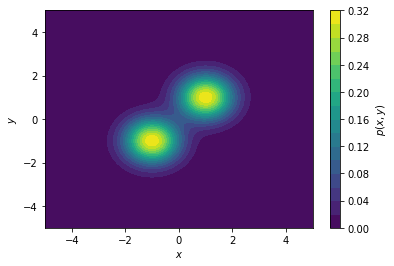

In [8]:
ctf = plt.contourf(x, y, z, 20)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
cb = plt.colorbar(ctf)
cb.set_label(r"$p(x, y)$")
plt.show()
#fig.savefig("./2d-gaussian.png")

In [9]:
print(x.shape, y.shape)
x_train = np.array([x.flatten(), y.flatten()]).T
y_train = z.flatten()
print(x_train.shape, y_train.shape)

(100, 100) (100, 100)
(10000, 2) (10000,)


## Model

In [10]:
model = Sequential()
model.add(Dense(2, input_shape=(2,), activation='tanh'))
for _ in range(2):
    model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='linear'))
model.compile(SGD(momentum=0.9, nesterov=True), loss='mean_squared_error')

In [11]:
hist = model.fit(x_train, y_train, validation_split=0.2, epochs=1000, batch_size=100, verbose=0)

### Predictions

In [12]:
y_pred = model.predict(x_train)

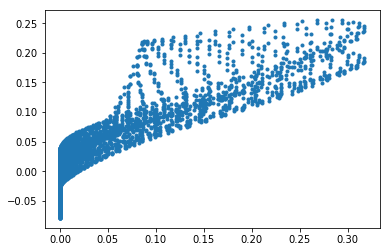

In [13]:
plt.plot(y_train, y_pred, '.')
plt.show()

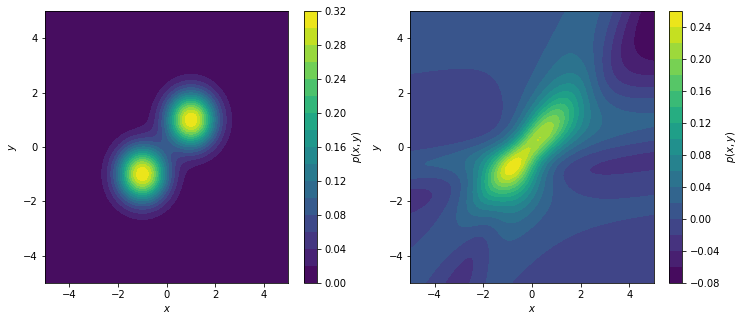

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax = ax.ravel()
ctf_true = ax[0].contourf(x, y, z, 20)
cb = fig.colorbar(ctf_true, ax=ax[0])
cb.set_label(r"$p(x, y)$")
ctf = ax[1].contourf(x, y, y_pred.reshape(100,100), 20)
cb = fig.colorbar(ctf, ax=ax[1])
cb.set_label(r"$p(x, y)$")
for a in ax:
    a.set_xlabel(r'$x$')
    a.set_ylabel(r'$y$')
plt.show()
#fig.savefig("2d_gaussians_comparison_2neurons.png")